To copy this template: File -> Save a Copy in Drive

***DISCLAIMER**: In case of any discrepancy in the assignment instruction, please refer to the `PDF` document.*

# Problem 1 - Algorithmic Performance Scaling

## 1.1

**Link to dataset:**
https://www.openml.org/search?type=data&status=active&sort=qualities.NumberOfClasses&order=desc&id=44321

In [2]:
from sklearn.datasets import fetch_openml
data = fetch_openml(data_id=44321, return_X_y=False, as_frame=True)
data = data["frame"]
print(data)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


        FILE_NAME                                    CATEGORY SUPER_CATEGORY
0      112644.jpg                Pepper_bell___Bacterial_spot    Pepper_bell
1       29563.jpg                         Blueberry___healthy      Blueberry
2      178390.jpg                            Cherry___healthy         Cherry
3       66090.jpg                            Tomato___healthy         Tomato
4      146111.jpg  Grape___Leaf_blight_(Isariopsis_Leaf_Spot)          Grape
...           ...                                         ...            ...
54300   11066.jpg                 Corn___Northern_Leaf_Blight           Corn
54301   57134.jpg                           Grape___Black_rot          Grape
54302   19567.jpg                      Peach___Bacterial_spot          Peach
54303  125325.jpg                       Potato___Early_blight         Potato
54304  160287.jpg                       Tomato___Early_blight         Tomato

[54305 rows x 3 columns]


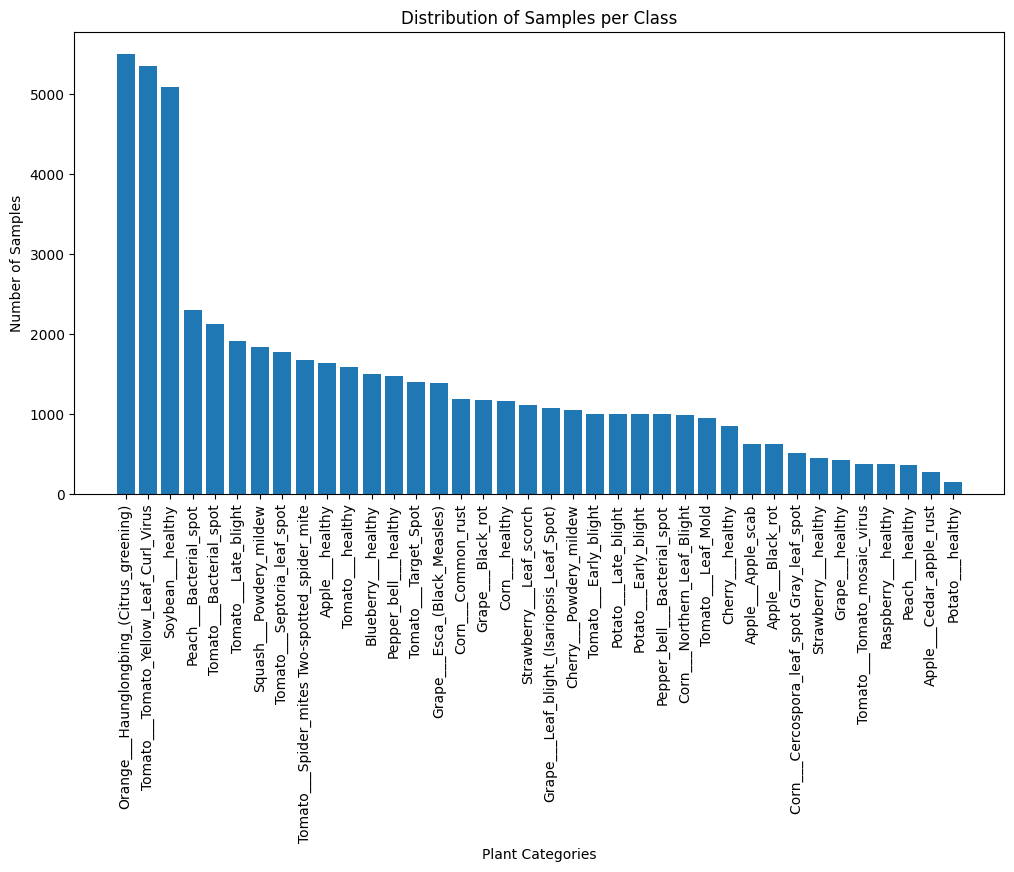

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
#Count the number of instances per class
class_counts = data['CATEGORY'].value_counts()

# Plot the distribution of samples per class
plt.figure(figsize=(12, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Plant Categories')
plt.ylabel('Number of Samples')
plt.title('Distribution of Samples per Class')
plt.xticks(rotation=90)
plt.show()

In [4]:
# Number of Features
num_features = len(data.columns)

# Number of Instances
num_instances = len(data)

# Number of Classes
num_classes = data["CATEGORY"].nunique()

# Number of Numerical Features
num_numerical_features = 0  # Initialize to zero, as there are no numerical features

# Number of Categorical Features
num_categorical_features = num_features

# Check for Numerical Features (if any)
for column in data.columns:
    if data[column].dtype == "float64" or data[column].dtype == "int64":
        num_numerical_features += 1

# Check for Categorical Features (excluding numerical)
if num_numerical_features > 0:
    num_categorical_features -= num_numerical_features

# Determine if the dataset is balanced
class_counts = data["CATEGORY"].value_counts()
is_balanced = all(count == class_counts.iloc[0] for count in class_counts)

# Print the summary
print(f"Number of Features: {num_features}")
print(f"Number of Instances: {num_instances}")
print(f"Number of Classes: {num_classes}")
print(f"Number of Numerical Features: {num_numerical_features}")
print(f"Number of Categorical Features: {num_categorical_features}")
print(f"Is the dataset balanced? {'Yes' if is_balanced else 'No'}")


Number of Features: 3
Number of Instances: 54305
Number of Classes: 38
Number of Numerical Features: 0
Number of Categorical Features: 3
Is the dataset balanced? No


**Answer:**

This means the dataset contains 3 different attributes or variables that describe each instance. These features could be anything from demographic information to measurements, but the details are not provided.There are a total of 54,305 data points or records in the dataset. Each data point represents a distinct observation.In this case, there are 38 different classes into which each instance can be categorized. All three features in the dataset are categorical in nature. This means that they describe different categories or labels for each instance.A balanced dataset means that each class in a classification problem has roughly the same number of instances. In this case, the dataset is not balanced, which suggests that some classes may have significantly more instances than others.

## 1.2

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Number of Features: 13
Number of Instances: 54305
Number of Classes: 38
Number of Numerical Features: 13
Number of Categorical Features: 0
Is the dataset balanced? False


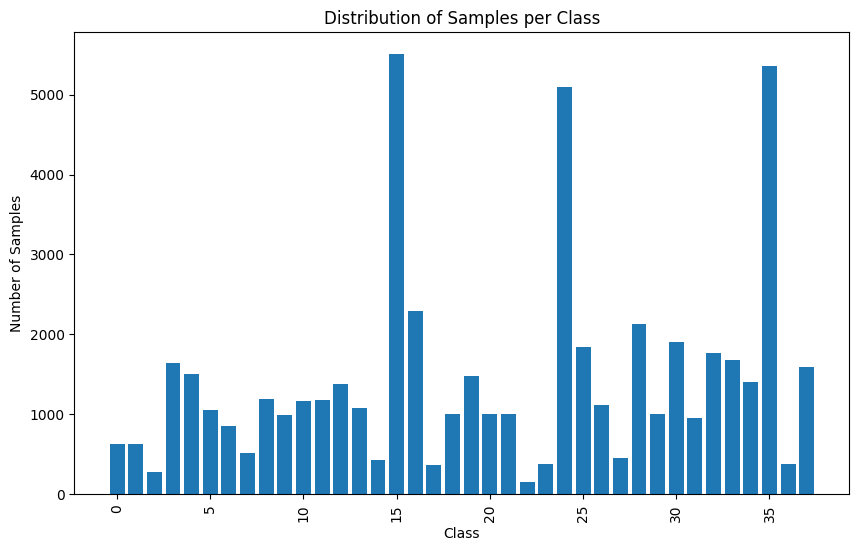

   Subset Size              Model  Accuracy  Training Time (s)
0          10%      Decision Tree  0.300157           0.005279
1          10%  Gradient Boosting  0.300157          23.331490
2          20%      Decision Tree  0.198785           0.006133
3          20%  Gradient Boosting  0.198785          37.256386
4          30%      Decision Tree  0.101372           0.009804
5          30%  Gradient Boosting  0.101372          71.466330
6          40%      Decision Tree  0.101372           0.012208
7          40%  Gradient Boosting  0.101372          91.228730
8          50%      Decision Tree  0.101372           0.014699
9          50%  Gradient Boosting  0.101372         101.765906
10         60%      Decision Tree  0.000000           0.015827
11         60%  Gradient Boosting  0.000000         123.184452
12         70%      Decision Tree  0.101372           0.023081
13         70%  Gradient Boosting  0.101372         139.426502
14         80%      Decision Tree  0.000000           0

In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt

# Load the dataset
data = fetch_openml(data_id=44321, return_X_y=False, as_frame=True)
data = data["frame"]

# Drop the file name column
data = data.drop(columns=['FILE_NAME'])

# Encode target labels to numeric values
label_encoder = LabelEncoder()
data['CATEGORY'] = label_encoder.fit_transform(data['CATEGORY'])

# Perform one-hot encoding for non-numeric columns
data = pd.get_dummies(data, columns=['SUPER_CATEGORY'], drop_first=True)

# Summarize dataset attributes
num_features = data.shape[1] - 1  # Excluding the target column
num_instances = data.shape[0]
num_classes = len(data['CATEGORY'].unique())
num_categorical_features = len(data.select_dtypes(include=['object']).columns)
num_numerical_features = num_features - num_categorical_features
is_balanced = data['CATEGORY'].value_counts().min() > num_instances / num_classes

print("Number of Features:", num_features)
print("Number of Instances:", num_instances)
print("Number of Classes:", num_classes)
print("Number of Numerical Features:", num_numerical_features)
print("Number of Categorical Features:", num_categorical_features)
print("Is the dataset balanced?", is_balanced)

# Plot the distribution of samples per class
class_counts = data['CATEGORY'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Distribution of Samples per Class")
plt.xticks(rotation=90)
plt.show()

# Split the data into training and test sets (80% train, 20% test)
X = data.drop(columns=['CATEGORY'])
y = data['CATEGORY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a table to store results
results_table = []

# Generate 10 different subsets of the training data
subset_sizes = np.arange(0.1, 1.1, 0.1)
for subset_size in subset_sizes:
    # Calculate the number of samples for the current subset
    num_samples = int(len(X_train) * subset_size)

    # Randomly subsample the training data
    X_subset = X_train.sample(n=num_samples, random_state=42)
    y_subset = y_train[X_train.index.isin(X_subset.index)]

    for model_name, model in [('Decision Tree', DecisionTreeClassifier(random_state=42)),
                              ('Gradient Boosting', GradientBoostingClassifier(random_state=42))]:
        # Train the classifier and measure the training time
        start_time = time.time()
        model.fit(X_subset, y_subset)
        end_time = time.time()

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Record results in the table
        results_table.append({'Subset Size': f'{int(subset_size * 100)}%',
                              'Model': model_name,
                              'Accuracy': accuracy,
                              'Training Time (s)': end_time - start_time})

# Create a DataFrame from the results
results_df = pd.DataFrame(results_table)

# Print the results table
print(results_df)


**Answer:**

Subset Size: This column represents the size of the subset used for training, ranging from 10% to 100% of the training data.
Model: This column indicates the type of model that was trained. In this case, you trained both Decision Tree and Gradient Boosting models.

Accuracy: This column shows the accuracy of the trained model when evaluated on the test set. Accuracy is a measure of how well the model's predictions match the actual outcomes. It ranges from 0% (poor accuracy) to 100% (perfect accuracy).

Training Time (s): This column represents the time it took to train the model in seconds (wall clock time).



## 1.3

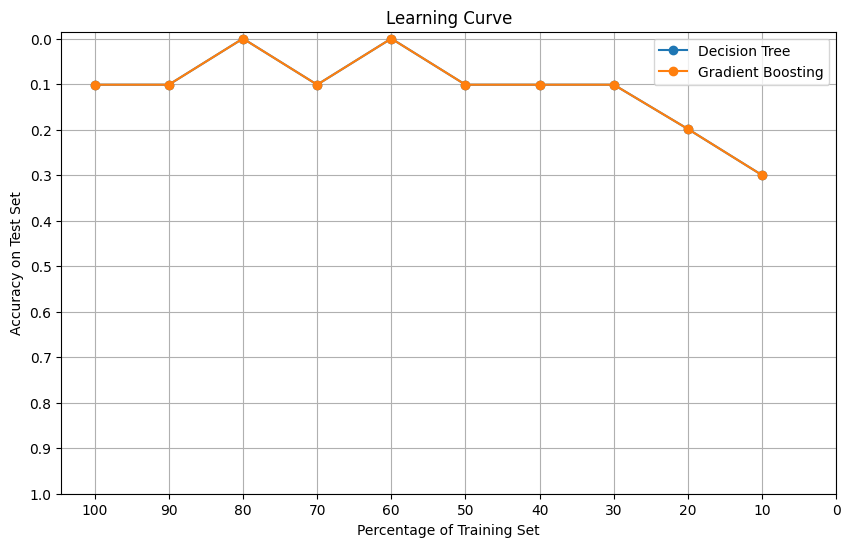

In [3]:
#subset sizes and corresponding accuracies
subset_sizes = results_df['Subset Size'].unique()
subset_sizes = np.array([int(ss.strip('%')) / 100 for ss in subset_sizes])
decision_tree_accuracies = results_df[results_df['Model'] == 'Decision Tree']['Accuracy'].values
gradient_boosting_accuracies = results_df[results_df['Model'] == 'Gradient Boosting']['Accuracy'].values

# Create the learning curve
plt.figure(figsize=(10, 6))
plt.plot(subset_sizes * 100, decision_tree_accuracies, marker='o', label='Decision Tree')
plt.plot(subset_sizes * 100, gradient_boosting_accuracies, marker='o', label='Gradient Boosting')
plt.xlabel("Percentage of Training Set")
plt.ylabel("Accuracy on Test Set")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, 101, 10))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

**Answer:**
Both models:

Starting with a 10% subset of the training data, both model's classifier achieves an accuracy of 30.02%. This accuracy is relatively high but decreases as more data is added.
As the training set size increases, the accuracy drops significantly. By the time 60% of the training data is used, the Decision Tree's accuracy has decreased to 0%, indicating that it struggles with larger datasets.

Both models exhibit the same accuracy values for the same percentage of the training set.This behavior suggests that the models have limitations in capturing the underlying patterns in the dataset, leading to similar performance regardless of the model chosen. The dataset may have characteristics that make it challenging for these specific models to improve accuracy even when provided with more data



## 1.4

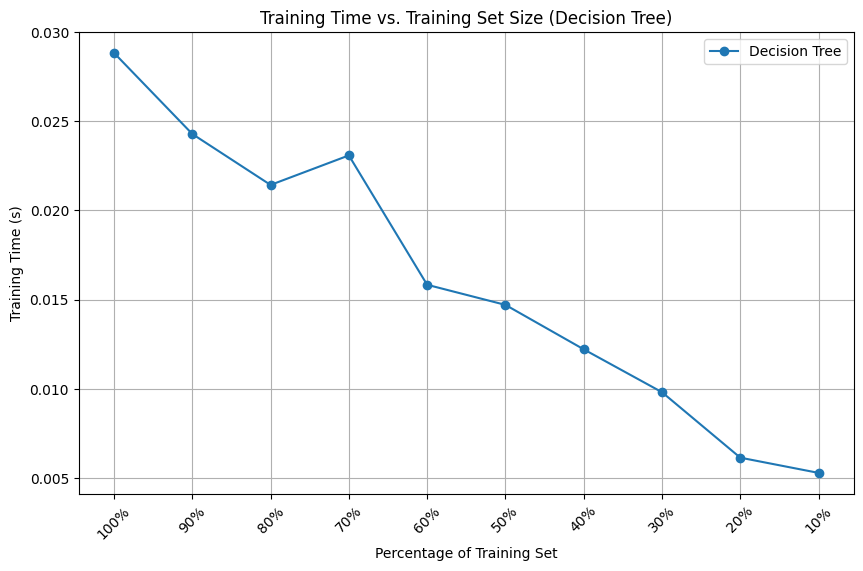

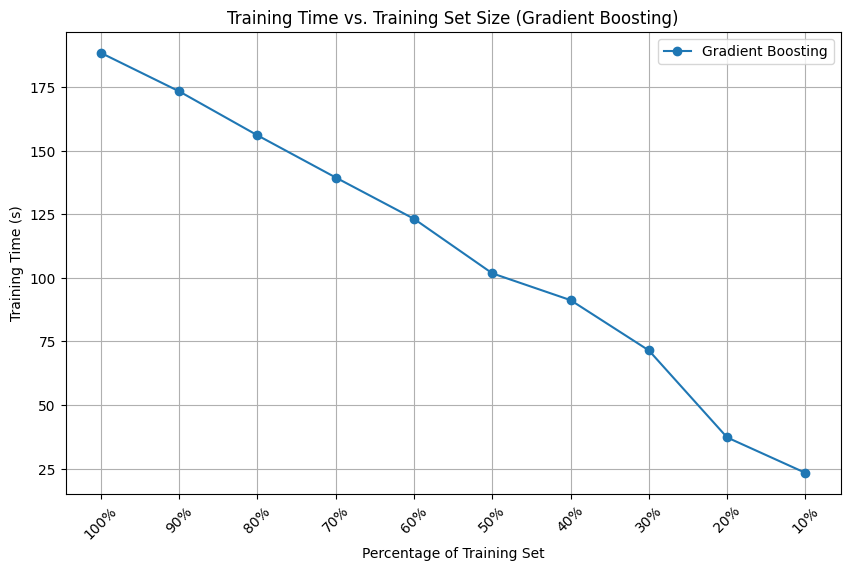

In [4]:
import matplotlib.pyplot as plt

# Separate the results for Decision Tree and Gradient Boosting
decision_tree_results = results_df[results_df['Model'] == 'Decision Tree']
gradient_boosting_results = results_df[results_df['Model'] == 'Gradient Boosting']

# Create a plot for Decision Tree
plt.figure(figsize=(10, 6))
plt.plot(decision_tree_results['Subset Size'], decision_tree_results['Training Time (s)'], marker='o', label='Decision Tree')
plt.xlabel("Percentage of Training Set")
plt.ylabel("Training Time (s)")
plt.title("Training Time vs. Training Set Size (Decision Tree)")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.gca().invert_xaxis()
plt.show()

# Create a plot for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.plot(gradient_boosting_results['Subset Size'], gradient_boosting_results['Training Time (s)'], marker='o', label='Gradient Boosting')
plt.xlabel("Percentage of Training Set")
plt.ylabel("Training Time (s)")
plt.title("Training Time vs. Training Set Size (Gradient Boosting)")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.gca().invert_xaxis()
plt.show()


**Answer:**

Decision Tree Training Time:

The training time for the Decision Tree classifier remains relatively low and consistent as the size of the training set increases.
Even as the training set size goes up to 100%, the training time for the Decision Tree remains under 0.03 seconds.

Gradient Boosting Training Time:

In contrast, the training time for the Gradient Boosting classifier is significantly higher than that of the Decision Tree.
It increases as more data is used for training. At a 10% subset, training time is approximately 23.33 seconds, and it grows progressively with larger subsets.
With 100% of the training data, Gradient Boosting takes around 188.41 seconds to train.

## 1.5

**Answer:**

Both Decision Tree and Gradient Boosting models show the same low accuracy for all subset sizes, ranging from approximately 0.0 to 0.3. The accuracy is consistently low, and there is no significant improvement in accuracy with larger training set sizes.

The training time for the Decision Tree model is significantly lower compared to the Gradient Boosting model for all subset sizes. Decision Tree training times are in the range of milliseconds, while Gradient Boosting training times are in the range of seconds.

Increasing the subset size does not lead to improved accuracy for either model. In fact, the accuracy remains consistently low regardless of the amount of training data used.

Given these results, it appears that the models may not be well-suited for the dataset, as accuracy is consistently low. Additionally, the Gradient Boosting model requires significantly more time to train compared to the Decision Tree model, with limited gains in accuracy.